In [25]:
import astropy.io.fits as pyfits
from scipy import *
import numpy as np
from pylab import *
import matplotlib as mpl
import matplotlib.pylab as plt
import os

hdulist = pyfits.open('allStar-l30e.2.fits')
idx_all=where( (hdulist[1].data['LOCATION_ID']>1))[0]
idx_noTelluric=where( (hdulist[1].data['LOCATION_ID']>1) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
# Number of Telluric standards = 17293
rvCC = hdulist[1].data['RV_CCFWHM']
rvAUTO = hdulist[1].data['RV_AUTOFWHM']
Teff = hdulist[1].data['TEFF']
idx_Teff5000 = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & (Teff<5000))[0]

idx_Teff5000_noT = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9)
                     & (Teff<5000))[0]

idx_SNR10 = where(hdulist[1].data['SNR']>10)[0]
idx_SNR20 = where(hdulist[1].data['SNR']>20)[0]
idx_SNR50 = where(hdulist[1].data['SNR']>50)[0]
idx_SNR100 = where(hdulist[1].data['SNR']>100)[0]

def read_spec(fitsfile):
    hdulist = pyfits.open('spec/'+fitsfile)
    ispec = hdulist[1].data
    if len(ispec.shape)>1:
        ispec=ispec[0]
    lambda0 = hdulist[1].header['CRVAL1']
    delta_lambda = hdulist[1].header['CDELT1']
    shift = hdulist[0].header['VHELIO']
    lambda_arr = 10**(lambda0+arange(len(ispec))*delta_lambda)
    return lambda_arr, ispec

idx_high_noTelluric = where( (rvCC>100) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
seed(10027)
idx_low_noTelluric = where( (rvCC<20) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
seed(10027)

classes = hdulist[1].data['ASPCAP_CLASS']
unique_classes = unique(classes)

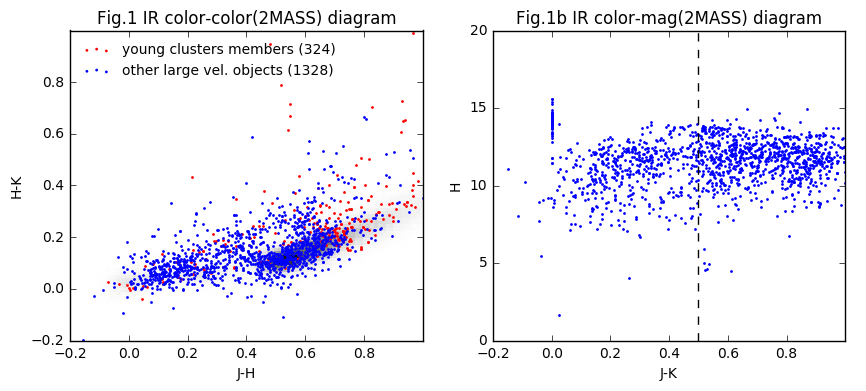

In [2]:
MagJ = hdulist[1].data['J'][idx_high_noTelluric]
MagH = hdulist[1].data['H'][idx_high_noTelluric]
MagK = hdulist[1].data['K'][idx_high_noTelluric]

idx_young_cluster = where((hdulist[1].data['APOGEE_TARGET2'][idx_high_noTelluric] & 2**13)!=0)[0]
idx_not_young_cluster = where((hdulist[1].data['APOGEE_TARGET2'][idx_high_noTelluric] & 2**13)==0)[0]

f=figure(figsize=(10,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.hist2d(hdulist[1].data['J']-hdulist[1].data['H'], hdulist[1].data['H']-hdulist[1].data['K'],range=[[-0.3,1],[-0.3,1]],bins=100,cmap='Greys')
ax1.scatter( (MagJ-MagH)[idx_young_cluster], (MagH-MagK)[idx_young_cluster], color='r',s=1,label='young clusters members (%i)'%(len(idx_young_cluster)))
ax1.scatter( (MagJ-MagH)[idx_not_young_cluster], (MagH-MagK)[idx_not_young_cluster], color='b',s=1,label='other large vel. objects (%s)'%(len(idx_not_young_cluster)))
ax1.legend(frameon=0,fontsize=10,loc=2)
ax1.set_title('Fig.1 IR color-color(2MASS) diagram')
ax1.set_xlabel('J-H')
ax1.set_ylabel('H-K')
ax1.set_xlim(-0.2,1)
ax1.set_ylim(-0.2,1)

ax2.scatter(MagJ-MagK, MagH, color='b',s=1)
ax2.plot([0.5,0.5],[0,20],'k--')
ax2.set_title('Fig.1b IR color-mag(2MASS) diagram')
ax2.set_xlabel('J-K')
ax2.set_ylabel('H')
ax2.set_xlim(-0.2,1)
ax2.set_ylim(0,20)

show()

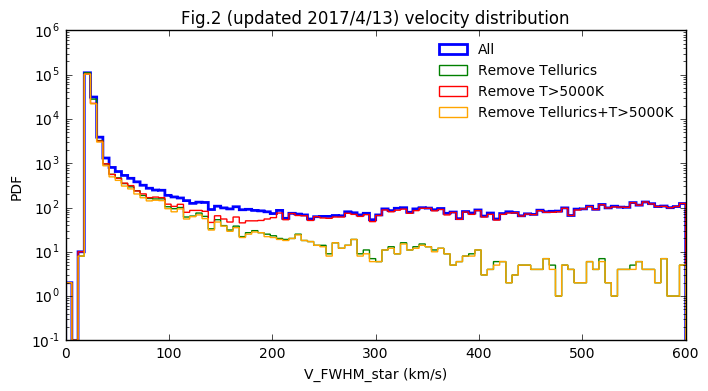

In [3]:
ibins=linspace(0,600,101)
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_Teff5000], bins=ibins,histtype='step',log=1,label='Remove T>5000K')
ax.hist(rvCC[idx_Teff5000_noT], bins=ibins,histtype='step',color='orange',log=1,label='Remove Tellurics+T>5000K')
#ax.hist(rvCC[idx_SNR], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>10')


ax.set_title('Fig.2 (updated 2017/4/13) velocity distribution')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

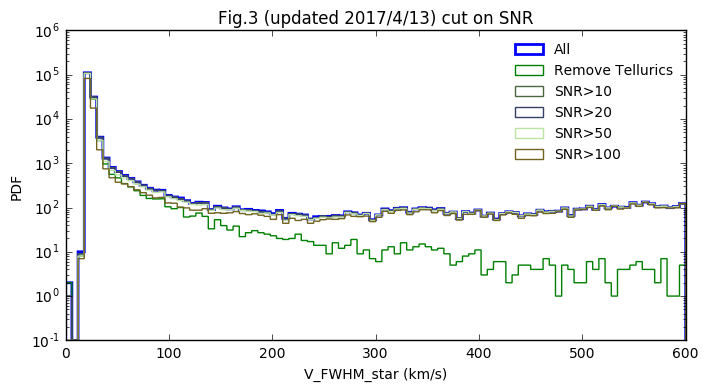

In [4]:
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_SNR10], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>10')
ax.hist(rvCC[idx_SNR20], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>20')
ax.hist(rvCC[idx_SNR50], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>50')
ax.hist(rvCC[idx_SNR100], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>100')

ax.set_title('Fig.3 (updated 2017/4/13) cut on SNR')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

/Users/jia/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


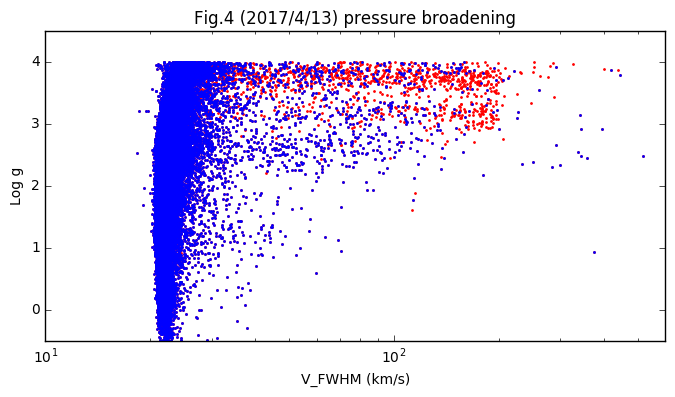

In [5]:
LOGG = hdulist[1].data['LOGG']

f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.scatter(rvCC, LOGG,color='r',s=1)
ax.scatter(rvCC[idx_noTelluric], LOGG[idx_noTelluric],color='b',s=1)

ax.set_xscale("log")
ax.set_title('Fig.4 (2017/4/13) pressure broadening')
ax.set_xlabel('V_FWHM (km/s)')
ax.set_ylabel('Log g')
ax.legend(frameon=0, fontsize=10)
ax.set_xlim(10,600)
ax.set_ylim(-0.5,4.5)
show()

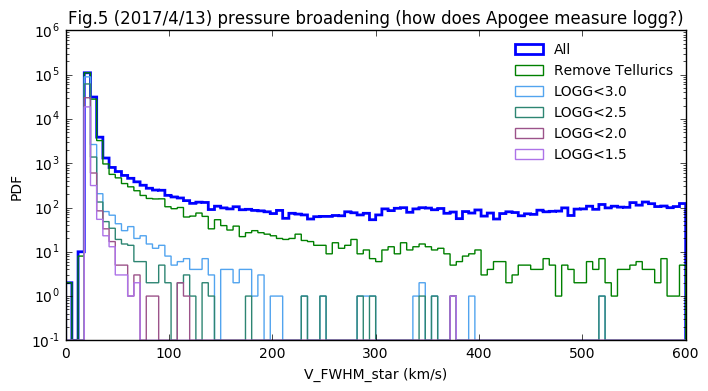

In [6]:
idx_LOGG30 = where( (hdulist[1].data['LOGG']<3) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG25 = where( (hdulist[1].data['LOGG']<2.5) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG20 = where( (hdulist[1].data['LOGG']<2) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG15 = where( (hdulist[1].data['LOGG']<1.5) & (hdulist[1].data['LOGG']>-10))[0]

f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_LOGG30], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<3.0')
ax.hist(rvCC[idx_LOGG25], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<2.5')
ax.hist(rvCC[idx_LOGG20], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<2.0')
ax.hist(rvCC[idx_LOGG15], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<1.5')

ax.set_title('Fig.5 (2017/4/13) pressure broadening (how does Apogee measure logg?)')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

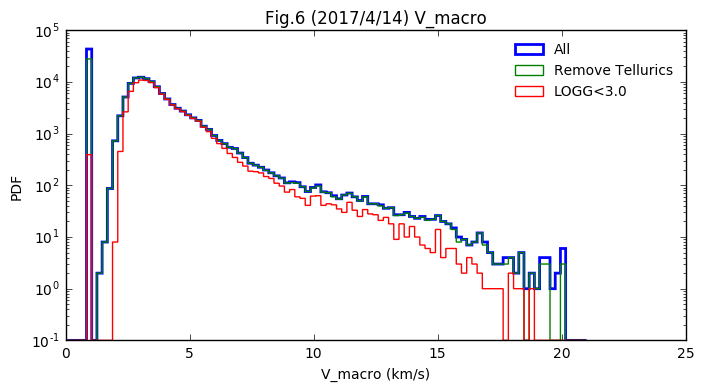

In [7]:
vmacro=hdulist[1].data['VMACRO']
ibins_macro = linspace(0,21,101)
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(vmacro[idx_all], bins=ibins_macro,histtype='step',log=1,lw=2, label='All')
ax.hist(vmacro[idx_noTelluric], bins=ibins_macro,histtype='step',log=1,label='Remove Tellurics')
ax.hist(vmacro[idx_LOGG30], bins=ibins_macro,histtype='step',log=1,label='LOGG<3.0')

ax.set_title('Fig.6 (2017/4/14) V_macro')
ax.set_xlabel('V_macro (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

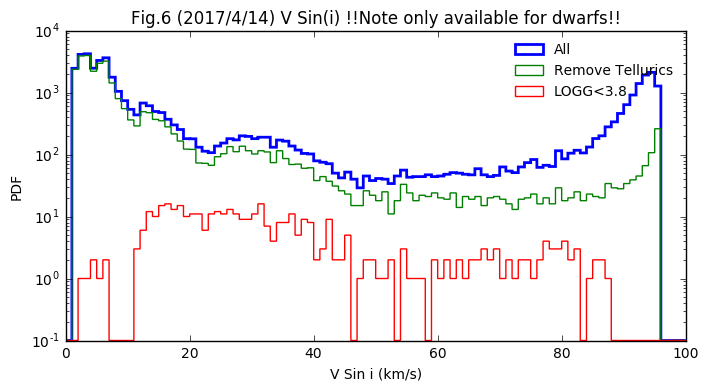

In [36]:
idx_LOGG38 = where( (hdulist[1].data['LOGG']<3) & (hdulist[1].data['LOGG']>-10))[0]
vsini=hdulist[1].data['VSINI']
ibins_vsini = linspace(0,100,101)
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(vsini[idx_all], bins=ibins_vsini,histtype='step',log=1,lw=2, label='All')
ax.hist(vsini[idx_noTelluric], bins=ibins_vsini,histtype='step',log=1,label='Remove Tellurics')
ax.hist(vsini[idx_LOGG38], bins=ibins_vsini,histtype='step',log=1,label='LOGG<3.8')

ax.set_title('Fig.6 (2017/4/14) V Sin(i) !!Note only available for dwarfs!!')
ax.set_xlabel('V Sin i (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

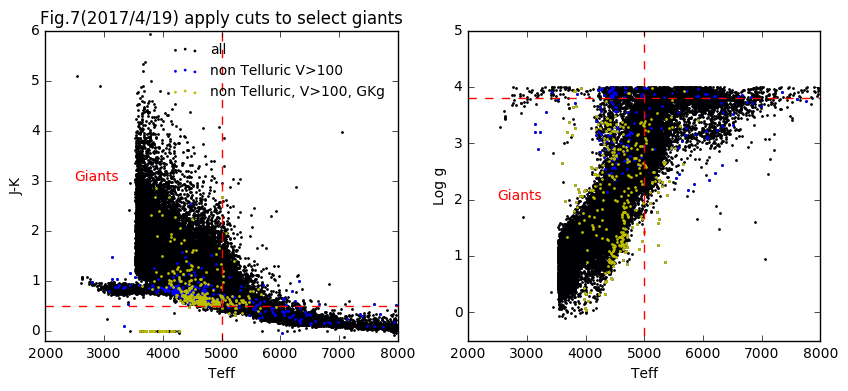

In [35]:
######### cuts: T<5000, J-K>0.5, M_H<2, logg<3.8
idx_GKg = lambda v: where((rvCC>v) & (classes=='GKg_a')+(classes=='GKg_b')+(classes=='GKg_c')+(classes=='GKg_d') & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
iidx_GKg = idx_GKg(30)

f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)
ax1.scatter(hdulist[1].data['TEFF'], hdulist[1].data['J']-hdulist[1].data['K'],s=1,label='all')
ax1.scatter(Teff[idx_high_noTelluric], MagJ-MagK,s=1,color='b',label='non Telluric V>100')
ax1.scatter(Teff[iidx_GKg], (hdulist[1].data['J']-hdulist[1].data['K'])[iidx_GKg],s=1,color='y',label='non Telluric, V>100, GKg')

ax1.set_xlabel('Teff')
ax1.set_ylabel('J-K')
ax1.set_xlim(2000,8000)
ax1.set_ylim(-0.2, 6)
ax1.plot([2000,8000],[0.5,0.5],'r--')
ax1.plot([5000,5000],[-0.2,6],'r--')
ax1.text(2500, 3, 'Giants', color='r')
ax1.legend(fontsize=10,frameon=0)
ax1.set_title('Fig.7(2017/4/19) apply cuts to select giants')
ax2.scatter(hdulist[1].data['TEFF'], hdulist[1].data['LOGG'],s=1,label='all')
ax2.scatter(hdulist[1].data['TEFF'][idx_high_noTelluric], hdulist[1].data['LOGG'][idx_high_noTelluric],
            s=1,color='b',label='non Telluric high V')
ax2.scatter(hdulist[1].data['TEFF'][iidx_GKg], hdulist[1].data['LOGG'][iidx_GKg],
            s=1,color='y',label='Gkg')

ax2.plot([2000,8000],[3.8,3.8],'r--')
ax2.plot([5000,5000],[-1,6],'r--')
ax2.set_xlabel('Teff')
ax2.set_ylabel('Log g')
ax2.text(2500, 2, 'Giants', color='r')
ax2.set_xlim(2000,8000)
ax2.set_ylim(-0.5,5)
show()

In [47]:
cut_telluric =logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9)
cut_logg     =(hdulist[1].data['LOGG']<3.8) & (hdulist[1].data['LOGG']>-10)
cut_teff     =(Teff<5000) 
cut_JK       =(hdulist[1].data['J']-hdulist[1].data['K'] > 0.5)
cut_class    =(classes=='GKg_a')+(classes=='GKg_b')+(classes=='GKg_c')+(classes=='GKg_d')

idx_LOGG38 = where(cut_telluric & cut_logg)[0]
idx_LOGG38_Teff = where(cut_telluric & cut_logg & cut_teff)[0]
idx_LOGG38_Teff_JK = where(cut_telluric & cut_logg & cut_teff & cut_JK)[0]
idx_LOGG38_Teff_JK_class = where(cut_telluric & cut_logg & cut_teff & cut_JK & cut_class)[0]

idx_class = where(cut_telluric & cut_class)[0]
idx_class_Teff = where(cut_telluric & cut_class & cut_teff)[0]
idx_class_Teff_JK = where(cut_telluric & cut_class & cut_teff & cut_JK)[0]
idx_class_Teff_JK_LOGG38 = where(cut_telluric & cut_class & cut_teff & cut_JK & cut_logg)[0]


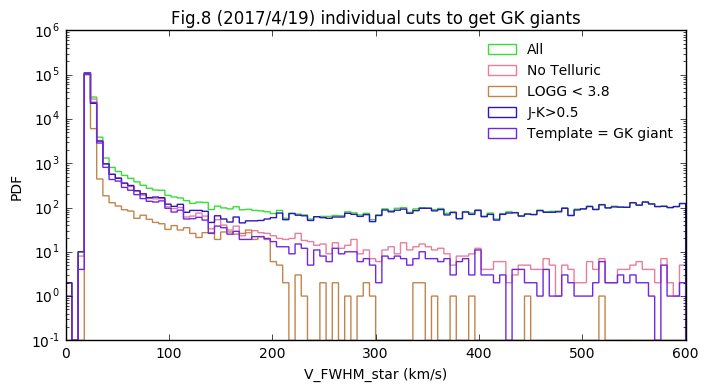

In [44]:
labels_arr = ['No Telluric', 'LOGG < 3.8', 'J-K>0.5', 'Template = GK giant']

seed(5)
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',color=rand(3),log=1,lw=1, label='All')
for iii in range(4):
    iidx=where([cut_telluric, cut_logg, cut_teff, cut_JK, cut_class][iii])[0]
    ax.hist(rvCC[iidx], bins=ibins,histtype='step',log=1,color=rand(3),lw=1, label=labels_arr[iii])
ax.set_title('Fig.8 (2017/4/19) individual cuts to get GK giants')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

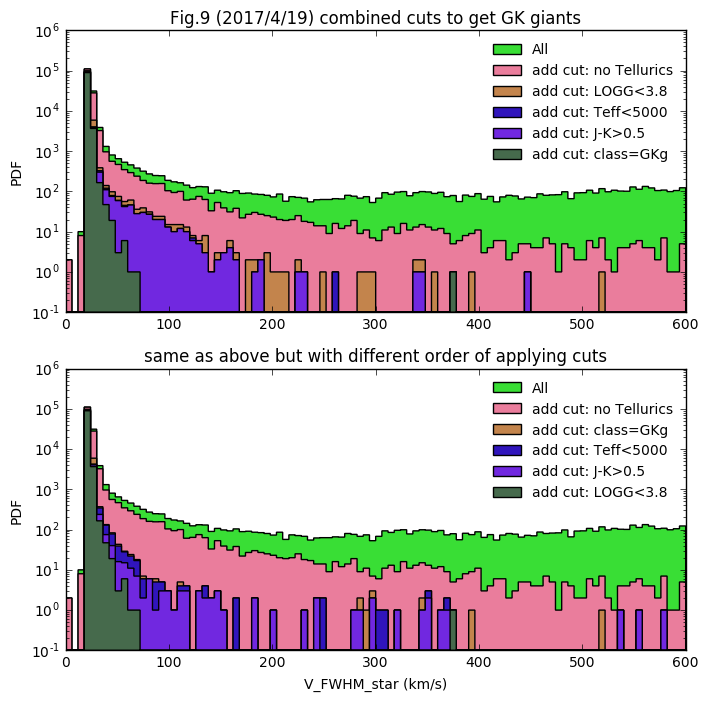

In [64]:
seed(5)
f=figure(figsize=(8,8))
ax=f.add_subplot(211)
ax2=f.add_subplot(212)

ax.hist(rvCC[idx_all], bins=ibins,histtype='stepfilled',log=1,color=rand(3),lw=1, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: no Tellurics')
ax.hist(rvCC[idx_LOGG38], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: LOGG<3.8')
ax.hist(rvCC[idx_LOGG38_Teff], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: Teff<5000')
ax.hist(rvCC[idx_LOGG38_Teff_JK], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: J-K>0.5')
ax.hist(rvCC[idx_LOGG38_Teff_JK_class], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: class=GKg')

ax.set_title('Fig.9 (2017/4/19) combined cuts to get GK giants')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)

seed(5)
ax2.hist(rvCC[idx_all], bins=ibins,histtype='stepfilled',log=1,color=rand(3),lw=1, label='All')
ax2.hist(rvCC[idx_noTelluric], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: no Tellurics')
ax2.hist(rvCC[idx_class], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: class=GKg')
ax2.hist(rvCC[idx_class_Teff], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: Teff<5000')
ax2.hist(rvCC[idx_class_Teff_JK], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: J-K>0.5')
ax2.hist(rvCC[idx_class_Teff_JK_LOGG38], bins=ibins,histtype='stepfilled',color=rand(3),log=1,label='add cut: LOGG<3.8')
ax2.set_ylabel('PDF')
ax2.set_xlabel('V_FWHM_star (km/s)')
ax2.set_title('same as above but with different order of applying cuts')
ax2.legend(frameon=0, fontsize=10)
show()

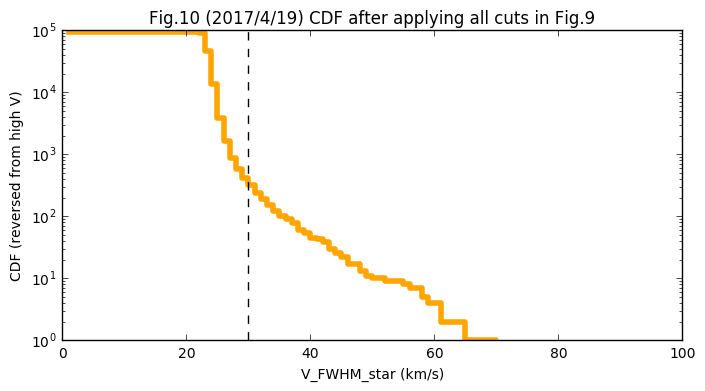

In [65]:
yhist,xbins=histogram(rvCC[idx_class_Teff_JK_LOGG38], bins=linspace(0,100,101))
yCDF = cumsum(yhist[::-1])[::-1]

f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.plot(xbins[1:],yCDF,drawstyle='steps-post',color='orange',lw=4)
ax.plot([30,30],[1,1e5],'k--',lw=1)
ax.set_yscale('log')
ax.set_ylabel('CDF (reversed from high V)')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_title('Fig.10 (2017/4/19) CDF after applying all cuts in Fig.9')
show()
